In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn import tree

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

In [10]:
df = pd.read_csv('breast-cancer-wisconsin.csv', names=['id_number', 'clump', 'cell_size', 'cell_shape', 'mar_adhe', 'sing_cell_size', 'bare_nuclei', 'bland_chro', 'normal_nuclei', 'mitoses', 'class'])
df.head()

,id_number,clump,cell_size,cell_shape,mar_adhe,sing_cell_size,bare_nuclei,bland_chro,normal_nuclei,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [11]:
df.shape

(699, 11)

In [12]:
df = df.drop(['id_number'], axis=1)
df

,clump,cell_size,cell_shape,mar_adhe,sing_cell_size,bare_nuclei,bland_chro,normal_nuclei,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [13]:
df.isna().sum()

clump             0
cell_size         0
cell_shape        0
mar_adhe          0
sing_cell_size    0
bare_nuclei       0
bland_chro        0
normal_nuclei     0
mitoses           0
class             0
dtype: int64

In [6]:
df['class'].value_counts()

2    458
4    241
Name: class, dtype: int64

In [7]:
df.dtypes

clump              int64
cell_size          int64
cell_shape         int64
mar_adhe           int64
sing_cell_size     int64
bare_nuclei       object
bland_chro         int64
normal_nuclei      int64
mitoses            int64
class              int64
dtype: object

In [8]:
#drop missing value '?'
df = df[df['bare_nuclei'] != '?'] 
df

,clump,cell_size,cell_shape,mar_adhe,sing_cell_size,bare_nuclei,bland_chro,normal_nuclei,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [9]:
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

In [10]:
df.describe()

,clump,cell_size,cell_shape,mar_adhe,sing_cell_size,bare_nuclei,bland_chro,normal_nuclei,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


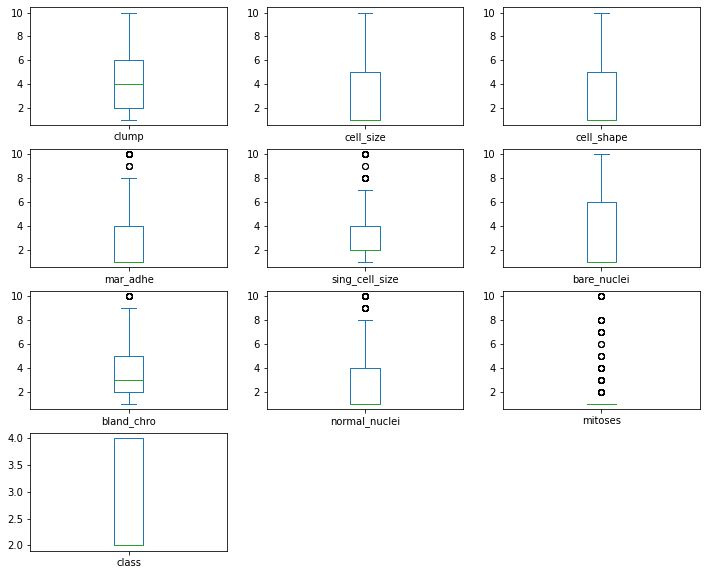

In [11]:
df.plot(kind='box', subplots = True, layout = (4,3), figsize = (12,10))
plt.show()

## Cek Outlier

In [12]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column clump outliers = 0.00%
Column cell_size outliers = 0.00%
Column cell_shape outliers = 0.00%
Column mar_adhe outliers = 8.64%
Column sing_cell_size outliers = 9.52%
Column bare_nuclei outliers = 0.00%
Column bland_chro outliers = 2.93%
Column normal_nuclei outliers = 10.98%
Column mitoses outliers = 100.00%
Column class outliers = 0.00%


In [13]:
df['mitoses'].value_counts()

1     563
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: mitoses, dtype: int64

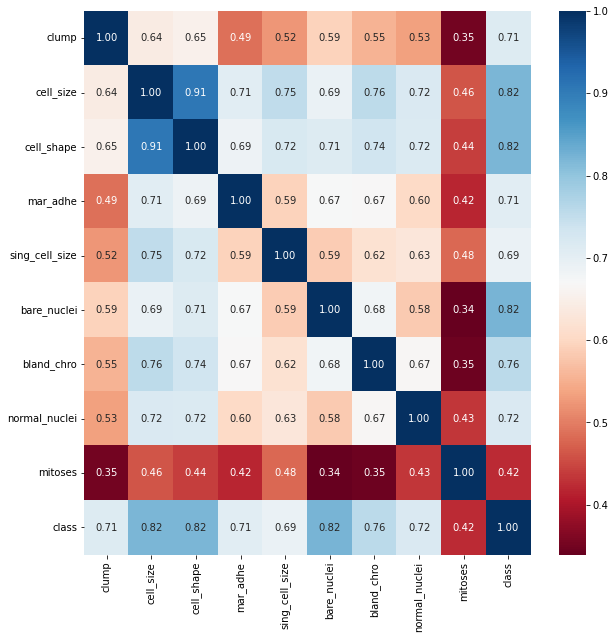

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(df.corr(), cmap='RdBu', annot=True, fmt=".2f")

In [15]:
df['label_class'] = df['class'].apply(lambda x: 1 if x == 4 else 0)
df

,clump,cell_size,cell_shape,mar_adhe,sing_cell_size,bare_nuclei,bland_chro,normal_nuclei,mitoses,class,label_class
0,5,1,1,1,2,1,3,1,1,2,0
1,5,4,4,5,7,10,3,2,1,2,0
2,3,1,1,1,2,2,3,1,1,2,0
3,6,8,8,1,3,4,3,7,1,2,0
4,4,1,1,3,2,1,3,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2,0
695,2,1,1,1,2,1,1,1,1,2,0
696,5,10,10,3,7,3,8,10,2,4,1
697,4,8,6,4,3,4,10,6,1,4,1


In [16]:
#gunakan 5  fitur korelasi tertinggi
df = df.drop(['mar_adhe', 'sing_cell_size', 'mitoses', 'class'], axis =1)
df.head()

,clump,cell_size,cell_shape,bare_nuclei,bland_chro,normal_nuclei,label_class
0,5,1,1,1,3,1,0
1,5,4,4,10,3,2,0
2,3,1,1,2,3,1,0
3,6,8,8,4,3,7,0
4,4,1,1,1,3,1,0


In [17]:
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column clump outliers = 0.00%
Column cell_size outliers = 0.00%
Column cell_shape outliers = 0.00%
Column bare_nuclei outliers = 0.00%
Column bland_chro outliers = 2.93%
Column normal_nuclei outliers = 10.98%
Column label_class outliers = 0.00%


In [18]:
Q1 = df['normal_nuclei'].quantile(0.25)
Q3 = df['normal_nuclei'].quantile(0.75)
iqr_nn = Q3-Q1
print(iqr_nn)

3.0


In [19]:
df = df[~((df['normal_nuclei'] < (Q1-1.5*iqr_nn)) | (df['normal_nuclei'] > (Q3+1.5*iqr_nn)))]
df.shape

(608, 7)

In [20]:
df = df.reset_index(drop=True)
df

,clump,cell_size,cell_shape,bare_nuclei,bland_chro,normal_nuclei,label_class
0,5,1,1,1,3,1,0
1,5,4,4,10,3,2,0
2,3,1,1,2,3,1,0
3,6,8,8,4,3,7,0
4,4,1,1,1,3,1,0
...,...,...,...,...,...,...,...
603,3,1,1,1,2,1,0
604,3,1,1,2,1,1,0
605,2,1,1,1,1,1,0
606,4,8,6,4,10,6,1


## Spliting Data

In [21]:
X = df.values[:, 0:6]
Y = df.values[:, 6]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

## Decision Tree (Model 1)

In [23]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

## Prediction

In [24]:
y_train_pred = clf_gini.predict(X_train)
y_pred = clf_gini.predict(X_test)

print("Train Result:")
print(classification_report(y_train, y_train_pred))
print('Model Accuracy:', clf_gini.score(X_train, y_train))
print("======================================================")

print("Test Result:")
print(classification_report(y_test, y_pred))
print('Test Accuracy:', clf_gini.score(X_test, y_test))
print("======================================================")

print('Confussion Matrix :')
print(confusion_matrix(y_test, y_pred))

Train Result:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       310
           1       0.95      0.92      0.94       115

    accuracy                           0.97       425
   macro avg       0.96      0.95      0.96       425
weighted avg       0.97      0.97      0.97       425

Model Accuracy: 0.9670588235294117
Test Result:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       134
           1       0.88      0.90      0.89        49

    accuracy                           0.94       183
   macro avg       0.92      0.93      0.92       183
weighted avg       0.94      0.94      0.94       183

Test Accuracy: 0.9398907103825137
Confussion Matrix :
[[128   6]
 [  5  44]]


In [25]:
print("F1 Score is ", f1_score(y_test,y_pred))

F1 Score is  0.888888888888889


## Random Forest (Model 2)

In [26]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

print("Train Result:")
print(classification_report(y_train, y_train_pred))
print('Model Accuracy:', rf_clf.score(X_train, y_train))
print("======================================================")

print("Test Result:")
print(classification_report(y_test, y_test_pred))
print('Test Accuracy:', rf_clf.score(X_test, y_test))
print("======================================================")

print('Confussion Matrix :')
print(confusion_matrix(y_test, y_test_pred))

Train Result:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       310
           1       1.00      1.00      1.00       115

    accuracy                           1.00       425
   macro avg       1.00      1.00      1.00       425
weighted avg       1.00      1.00      1.00       425

Model Accuracy: 1.0
Test Result:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       134
           1       0.92      0.98      0.95        49

    accuracy                           0.97       183
   macro avg       0.96      0.97      0.97       183
weighted avg       0.97      0.97      0.97       183

Test Accuracy: 0.9726775956284153
Confussion Matrix :
[[130   4]
 [  1  48]]


In [28]:
print("F1 Score is ", f1_score(y_test,y_test_pred))

F1 Score is  0.9504950495049506
